In [1]:
import pandas as pd
import numpy as np
from matplotlib import style
import matplotlib.pyplot as pyplot
import sklearn
from sklearn import linear_model
import pickle

In [2]:
# Read data from CSV file
data = pd.read_csv("student-mat.csv", sep=";")

In [3]:
data.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


In [4]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [5]:
# Select column for the model
reg_data = data[["studytime", "failures", "absences", "G1", "G2", "G3"]]

In [6]:
reg_data.head(10)

,studytime,failures,absences,G1,G2,G3
0,2,0,6,5,6,6
1,2,0,4,5,5,6
2,2,3,10,7,8,10
3,3,0,2,15,14,15
4,2,0,4,6,10,10
5,2,0,10,15,15,15
6,2,0,0,12,12,11
7,2,0,6,6,5,6
8,2,0,0,16,18,19
9,2,0,0,14,15,15


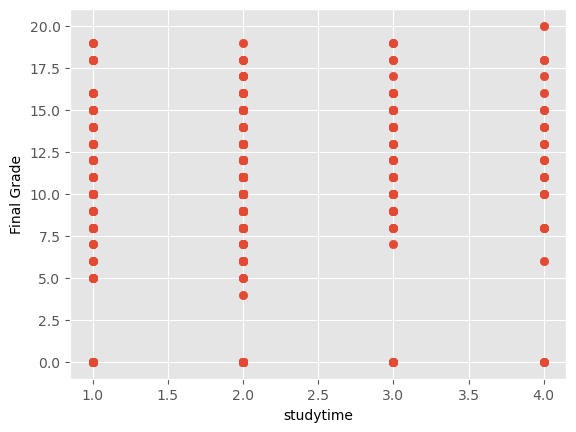

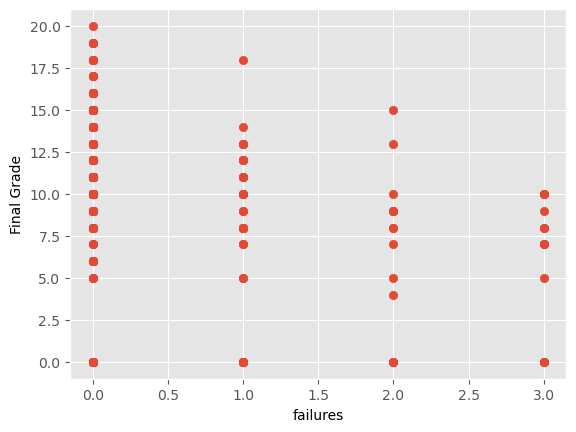

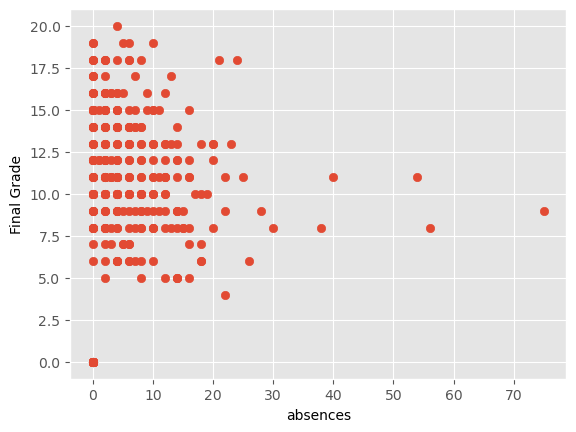

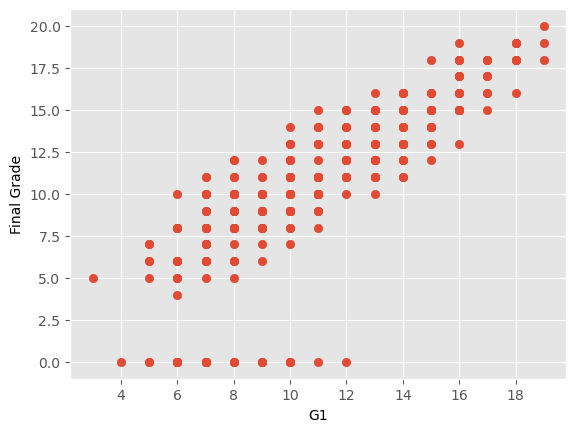

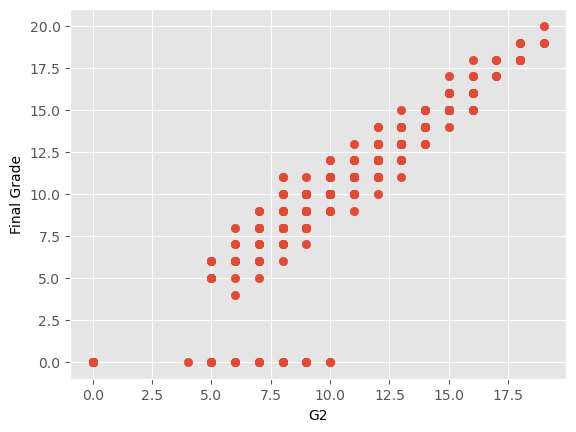

In [7]:
# Plotting data
for p in reg_data.drop(["G3"], axis=1).columns:
    style.use("ggplot")
    pyplot.scatter(reg_data[p],reg_data["G3"])
    pyplot.xlabel(p)
    pyplot.ylabel("Final Grade")
    pyplot.show()

In [8]:
predict = "G3"

In [9]:
X = np.array(reg_data.drop([predict], axis=1))
y = np.array(reg_data[predict])

In [10]:
# Train the model 100 times to get the best accuracy
best_acc = 0
for _ in range(100):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size= 0.1)
    linear = linear_model.LinearRegression()
    linear.fit(x_train, y_train)
    acc = linear.score(x_test, y_test)

    if acc > best_acc:
        best_acc = acc
        # Save model in pickle file
        with open("student_model.pickle", "wb") as f:
            pickle.dump(linear, f)

In [11]:
print(best_acc)

0.9591225941705798


In [12]:
# Load model
pickle_in = open("student_model.pickle", "rb")
linear = pickle.load(pickle_in)

In [13]:
print("Coefficient: \n", linear.coef_)
print("Intercept: \n", linear.intercept_)

Coefficient: 
 [-0.19079323 -0.26577213  0.03895856  0.15212502  0.99516111]
Intercept: 
 -1.6855120489364133


In [14]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size= 0.1)

In [15]:
predictions = linear.predict(x_test)

In [16]:
for i in range(len(predictions)):
    print(x_test[i], y_test[i], predictions[i])

[ 3  0  5 18 18] 19 18.58805127849996
[1 3 2 8 8] 10 6.582584434459122
[ 4  0 10  8  8] 8 7.119189598037744
[ 4  0  0 11 11] 11 10.171462402478525
[ 4  0  6 14 12] 13 11.856749898564617
[ 4  0  7 16 15] 17 15.18544180991407
[ 1  0  4 14 12] 11 12.35121246683655
[ 2  0  2 10 10] 11 9.483679846512887
[ 2  0  0 17 16] 17 16.441604491388077
[ 2  0  2 12 10] 11 9.78792987903522
[ 2  0  0 13 14] 15 13.842782211559868
[ 4  0 12 16 16] 16 16.375395700564862
[ 2  0  0 16 18] 18 18.279801689910457
[ 1  1 24 18 18] 18 19.444078178621343
[ 2  0  0 15 15] 15 15.142193351473974
[ 2  0  4 14 13] 13 13.155580347036476
[2 1 0 7 7] 0 5.698132231603886
[2 1 0 6 5] 0 3.5556850005591745
[ 3  0  0 16 17] 17 17.093847355326837
[ 4  0  8 11 11] 10 10.483130855692954
[ 2  0  6 10 11] 11 10.634675180511874
[2 0 0 8 7] 8 6.11602937851163
[1 1 4 6 9] 8 7.882956883925324
[ 2  0  0 14 15] 15 14.990068335212808
[ 1  0 12 10 13] 12 13.049541962398086
[ 1  0  6 14 13] 13 13.42429068753193
[ 1  0 10 18 19] 19 20.159591